# Bootstrap example

Suppose we have a Bernoulli random variable $X$ with unknown parameter $p$. We want to estimate $p$. We run a simulation of 10 trials and get a sample of the following values: 1, 1, 1, 0, 1, 1, 1, 0, 0, 1. We want to estimate $p$ and its confidence interval.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st 


In [78]:
samples = np.array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

mu = samples.mean()
print(mu)

0.7


So the expected value of `p` is 0.7. The number of samples is too small to estimate the confidence intervals directly using the normal distribution. We will use the bootstrap method to estimate the confidence intervals.

First we generate several bootstrap samples.

In [79]:
n = 5000

def bootstrap_sample(data):
    return np.random.choice(data, size=len(data), replace=True)

bootstrap_samples = np.array([bootstrap_sample(samples) for _ in range(n)])

print(bootstrap_samples)

[[1 1 1 ... 1 0 0]
 [1 1 0 ... 1 1 0]
 [0 0 0 ... 0 1 1]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 0 1]
 [0 1 1 ... 1 1 0]]


Note that each sample is a list of 10 elements, distributed according to the original sample. However, the mean of these samples will be normally distributed by the central limit theorem.

In [80]:
bootstrap_sample_means = bootstrap_samples.mean(axis=1)

mean = np.mean(bootstrap_sample_means)
std_dev = np.std(bootstrap_sample_means, ddof=1)  # Use ddof=1 for sample standard deviation

print(np.round(mean, 2), np.round(std_dev, 2))

0.7 0.15


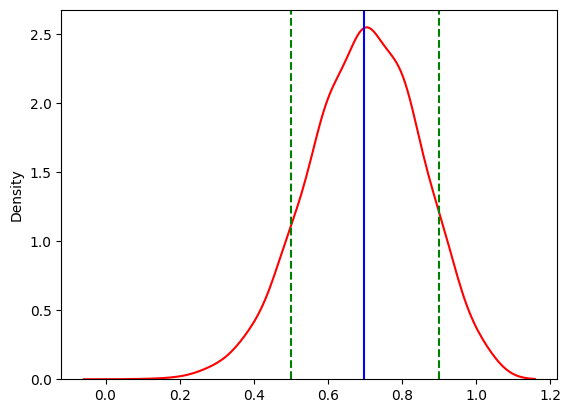

[0.5 0.9]


In [85]:
# plot smoothened histogram of the bootstrap samples
sns.kdeplot(bootstrap_sample_means, color='red', bw_adjust=2)
plt.axvline(mean, color='blue')

# 90% confidence interval
confidence_interval = np.percentile(bootstrap_sample_means, [5, 95])

# add confidence intervals to the plot as a dotted line
plt.axvline(confidence_interval[0], color='green', linestyle='dashed')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed')

plt.show()

print(confidence_interval)
